In [11]:
#Imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import functools
import seaborn as sns
import statistics
import statsmodels.api as sm
import warnings
from datetime import timedelta
from sklearn import preprocessing
from datetime import datetime
import random
warnings.filterwarnings('ignore')

In [ ]:
mig_matrix= pd.read_csv('migration.matrix.csv')

In [ ]:
pak_dist= pd.read_csv('Pakistan Districts (LFS-21).csv')

In [ ]:
set1= set(mig_matrix['destination'])
set2= set(pak_dist['District'])

In [ ]:
print(len(set1))
print(len(set2))

In [ ]:
result_set = set1-set2
result_set

In [ ]:
mig_matrix.head(20)

In [ ]:
pak_dist.head(20)

In [ ]:
lat_dic={}
long_dic={}

In [ ]:
pak_dist.shape

In [ ]:
for i in range(0, len(pak_dist)):
    lat_dic[pak_dist['District'][i]]= pak_dist['Lat'][i]
    long_dic[pak_dist['District'][i]]= pak_dist['Long'][i]
    

In [7]:
origin_point=[]
destination_point=[]
for i in range(0, len(mig_matrix)):
    
    lat_origin= lat_dic[mig_matrix['origin'][i]]
    long_origin= long_dic[mig_matrix['origin'][i]]
    lat_destination= lat_dic[mig_matrix['destination'][i]]
    long_destination= long_dic[mig_matrix['destination'][i]]
    origin_point.append([lat_origin, long_origin])
    destination_point.append([lat_destination, long_destination])
    
    

NameError: name 'mig_matrix' is not defined

In [8]:
mig_matrix['origin_point']= origin_point
mig_matrix['destination_point']= destination_point

NameError: name 'mig_matrix' is not defined

In [131]:
for i in range(0, len(mig_matrix)):
    if mig_matrix['origin'][i] == mig_matrix['destination'][i]:
        mig_matrix['migrant_value'][i]= 0

In [130]:
mig_matrix.head()

,origin,destination,migrant_value,origin_point,destination_point
0,Abbottabad,Abbottabad,0,"[33.834187, 73.21505]","[33.834187, 73.21505]"
1,Astore,Abbottabad,0,"[35.3561, 74.855582]","[33.834187, 73.21505]"
2,Attock,Abbottabad,3,"[33.021768, 71.768528]","[33.834187, 73.21505]"
3,Awaran,Abbottabad,0,"[25.433333, 64.366667]","[33.834187, 73.21505]"
4,Badin,Abbottabad,0,"[24.256266, 69.050446]","[33.834187, 73.21505]"


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# create a graph object
G = nx.Graph()



for i in range(0, len(pak_dist)):
    G.add_node(pak_dist['District'][i], pos=(pak_dist['Long'][i], pak_dist['Lat'][i]))
    
for i in range(0, len(mig_matrix)):
    if mig_matrix['migrant_value'][i]==0:
        continue
    G.add_edge(mig_matrix['origin'][i], mig_matrix['destination'][i], weight= mig_matrix['migrant_value'][i])
# get the positions of the nodes
pos = nx.get_node_attributes(G, 'pos')

# draw the graph with nodes and edges
nx.draw_networkx_edges(G, pos, node_size=1, width=0.1)

# show the plot

plt.title('Network of Migration')

plt.show()


NameError: name 'pak_dist' is not defined

In [152]:
data= pd.DataFrame(weights)

In [153]:
data.describe()

,0
count,2291.000000
mean,8.191619
std,19.389693
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,457.000000


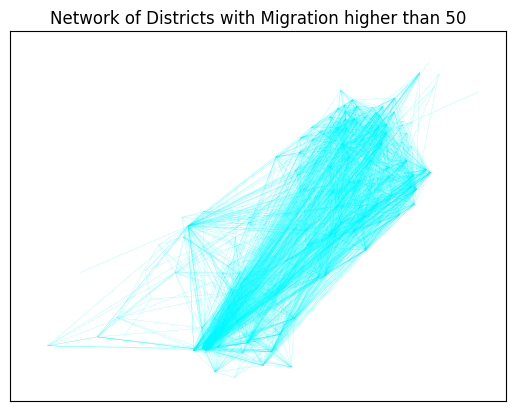

In [192]:
weights = nx.get_edge_attributes(G, 'weight').values()
vmin = min(weights)
vmax = max(weights)


norm = Normalize(vmin=vmin, vmax=vmax)

# create a scalar mappable object
sm = cm.ScalarMappable(cmap=cmap, norm=norm)

# draw the graph with nodes and edges
for u, v, d in G.edges(data=True):
    # get the weight of the edge
    weight = d['weight']
    edge_color = sm.to_rgba(weight)
    
    # get the color of the edge from the scalar mappable
    
    # draw the edge with the color and width
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_color, width=0.1)

# draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=0)

plt.title('Network of Districts with Migration higher than 50')
# show the plot
plt.show()